# TODOS:
* Set baseline, there are different number of songs each year
* top words over all time for both genders
* line plots of audio features with dropdown to select year
* research regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [2]:
billboard = pd.read_json('./data/billboard/data.json')

In [3]:
flatten = [item for sublist in billboard['songs'] for item in sublist]

In [4]:
billboard = pd.DataFrame(flatten)
billboard.head()

artist  num_lines  \
0         Nat King Cole         17   
1       Andrews Sisters         31   
2            Patti Page         16   
3  Tennessee Ernie Ford         18   
4            Patti Page          3   

                                           sentiment                tags  \
0  {'neg': 0.155, 'neu': 0.646, 'pos': 0.199, 'co...  [jazz, pop, swing]   
1  {'neg': 0.036000000000000004, 'neu': 0.74, 'po...                  []   
2  {'neg': 0.053, 'neu': 0.596, 'pos': 0.35100000...      [country, pop]   
3  {'neg': 0.167, 'neu': 0.602, 'pos': 0.231, 'co...                  []   
4  {'neg': 0.07, 'neu': 0.85, 'pos': 0.079, 'comp...      [country, pop]   

   f_k_grade  year  pos  num_syllables  difficult_words  fog_index  \
0        2.9  1950    2          189.0               13        5.2   
1        3.3  1950   17          270.9               40        4.4   
2        2.9  1950   18          174.6                5        5.2   
3        0.9  1950   20          135.9               10        4.4   
4        6.0  1950   21           46.8                9        6.0   

                title  num_dupes  flesch_index  num_words  
0           Mona Lisa         10         88.74        145  
1    I Wanna Be Loved         32         82.31        189  
2     Tennessee Waltz         10         88.74        138  
3  I'll Never Be Free          3         99.23        117  
4         All My Love          0         69.79         32

In [5]:
spotify = pd.read_excel('https://query.data.world/s/tyog5teoqwi3o4c3mcvzk34uj5wvhn')
spotify.head()

SongID  \
0                      AdictoTainy, Anuel AA & Ozuna   
1  The Ones That Didn't Make It Back HomeJustin M...   
2                  ShallowLady Gaga & Bradley Cooper   
3                EnemiesPost Malone Featuring DaBaby   
4    Bacc At It AgainYella Beezy, Gucci Mane & Quavo   

                         Performer                                    Song  \
0          Tainy, Anuel AA & Ozuna                                  Adicto   
1                     Justin Moore  The Ones That Didn't Make It Back Home   
2       Lady Gaga & Bradley Cooper                                 Shallow   
3     Post Malone Featuring DaBaby                                 Enemies   
4  Yella Beezy, Gucci Mane & Quavo                        Bacc At It Again   

                                       spotify_genre        spotify_track_id  \
0                                  ['pop reggaeton']  3jbT1Y5MoPwEIpZndDDwVq   
1  ['arkansas country', 'contemporary country', '...                     NaN   
2                               ['dance pop', 'pop']  2VxeLyX666F8uXCJ0dZF8B   
3                  ['dfw rap', 'melodic rap', 'rap']  0Xek5rqai2jcOWCYWJfVCF   
4     ['dfw rap', 'rap', 'southern hip hop', 'trap']  2biNa12dMbHJrHVFRt8JyO   

                           spotify_track_preview_url  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  https://p.scdn.co/mp3-preview/fa6fa6f6f363be29...   

              spotify_track_album  spotify_track_explicit  \
0  Adicto (with Anuel AA & Ozuna)                     0.0   
1                             NaN                     NaN   
2       A Star Is Born Soundtrack                     0.0   
3            Hollywood's Bleeding                     1.0   
4                Bacc At It Again                     1.0   

   spotify_track_duration_ms  spotify_track_popularity  ...   key  loudness  \
0                   270740.0                      91.0  ...  10.0    -4.803   
1                        NaN                       NaN  ...   NaN       NaN   
2                   215733.0                      88.0  ...   7.0    -6.362   
3                   196760.0                      86.0  ...   6.0    -4.169   
4                   228185.0                      61.0  ...   8.0    -5.725   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0   0.0       0.0735       0.01700          0.000016    0.1790    0.623   
1   NaN          NaN           NaN               NaN       NaN      NaN   
2   1.0       0.0308       0.37100          0.000000    0.2310    0.323   
3   1.0       0.2100       0.05880          0.000000    0.0955    0.667   
4   0.0       0.1680       0.00124          0.000001    0.0716    0.856   

     tempo  time_signature  
0   80.002             4.0  
1      NaN             NaN  
2   95.799             4.0  
3   76.388             4.0  
4  135.979             4.0  

[5 rows x 22 columns]

In [6]:
hot_100 = pd.read_csv('https://query.data.world/s/qo4q5kg6zzqyuxafnygf4v3esc6vl5')
hot_100.head()

url      WeekID  \
0  http://www.billboard.com/charts/hot-100/1958-0...    8/2/1958   
1  http://www.billboard.com/charts/hot-100/1995-1...   12/2/1995   
2  http://www.billboard.com/charts/hot-100/1997-1...  10/11/1997   
3  http://www.billboard.com/charts/hot-100/2006-0...    7/1/2006   
4  http://www.billboard.com/charts/hot-100/2009-1...  10/24/2009   

   Week Position                                               Song  \
0              1                                   Poor Little Fool   
1              1                                      One Sweet Day   
2              1  Candle In The Wind 1997/Something About The Wa...   
3              1                                Do I Make You Proud   
4              1                                                  3   

                    Performer  \
0                Ricky Nelson   
1  Mariah Carey & Boyz II Men   
2                  Elton John   
3                Taylor Hicks   
4              Britney Spears   

                                              SongID  Instance  \
0                       Poor Little FoolRicky Nelson         1   
1            One Sweet DayMariah Carey & Boyz II Men         1   
2  Candle In The Wind 1997/Something About The Wa...         1   
3                    Do I Make You ProudTaylor Hicks         1   
4                                    3Britney Spears         1   

   Previous Week Position  Peak Position  Weeks on Chart  
0                     NaN              1               1  
1                     NaN              1               1  
2                     NaN              1               1  
3                     NaN              1               1  
4                     NaN              1               1

In [112]:
hot_100_features = hot_100.merge(spotify, how='left', on=['SongID', 'Song', 'Performer'])
hot_100_features.head()

url      WeekID  \
0  http://www.billboard.com/charts/hot-100/1958-0...    8/2/1958   
1  http://www.billboard.com/charts/hot-100/1995-1...   12/2/1995   
2  http://www.billboard.com/charts/hot-100/1997-1...  10/11/1997   
3  http://www.billboard.com/charts/hot-100/2006-0...    7/1/2006   
4  http://www.billboard.com/charts/hot-100/2009-1...  10/24/2009   

   Week Position                                               Song  \
0              1                                   Poor Little Fool   
1              1                                      One Sweet Day   
2              1  Candle In The Wind 1997/Something About The Wa...   
3              1                                Do I Make You Proud   
4              1                                                  3   

                    Performer  \
0                Ricky Nelson   
1  Mariah Carey & Boyz II Men   
2                  Elton John   
3                Taylor Hicks   
4              Britney Spears   

                                              SongID  Instance  \
0                       Poor Little FoolRicky Nelson         1   
1            One Sweet DayMariah Carey & Boyz II Men         1   
2  Candle In The Wind 1997/Something About The Wa...         1   
3                    Do I Make You ProudTaylor Hicks         1   
4                                    3Britney Spears         1   

   Previous Week Position  Peak Position  Weeks on Chart  ... key loudness  \
0                     NaN              1               1  ... NaN      NaN   
1                     NaN              1               1  ... NaN      NaN   
2                     NaN              1               1  ... NaN      NaN   
3                     NaN              1               1  ... NaN      NaN   
4                     NaN              1               1  ... NaN      NaN   

  mode speechiness  acousticness  instrumentalness  liveness  valence  tempo  \
0  NaN         NaN           NaN               NaN       NaN      NaN    NaN   
1  NaN         NaN           NaN               NaN       NaN      NaN    NaN   
2  NaN         NaN           NaN               NaN       NaN      NaN    NaN   
3  NaN         NaN           NaN               NaN       NaN      NaN    NaN   
4  NaN         NaN           NaN               NaN       NaN      NaN    NaN   

   time_signature  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  

[5 rows x 29 columns]

In [8]:
artist_gender = pd.read_csv('./data/singers_gender.csv', encoding = "ISO-8859-1")
artist_gender.head()

artist gender                       category
0   12 Gauge   male  African-American_male_rappers
1       1987   male           Swedish_male_singers
2   2 Chainz   male  African-American_male_rappers
3  2 Pistols   male  African-American_male_rappers
4  21 Savage   male  African-American_male_rappers

In [9]:
data = billboard.merge(artist_gender, how='left', on='artist')
data.to_csv('./output/data_unfilled.csv')

In [10]:
data = pd.read_csv('./output/data.csv', index_col=0)
data.head()

artist        gender  num_lines  \
0         Nat King Cole          male         17   
1       Andrews Sisters  female group         31   
2            Patti Page        female         16   
3  Tennessee Ernie Ford          male         18   
4            Patti Page        female          3   

                                           sentiment  \
0  {'neg': 0.155, 'neu': 0.646, 'pos': 0.199, 'co...   
1  {'neg': 0.036000000000000004, 'neu': 0.74, 'po...   
2  {'neg': 0.053, 'neu': 0.596, 'pos': 0.35100000...   
3  {'neg': 0.167, 'neu': 0.602, 'pos': 0.231, 'co...   
4  {'neg': 0.07, 'neu': 0.85, 'pos': 0.079, 'comp...   

                       tags  f_k_grade  year  pos  num_syllables  \
0  ['jazz', 'pop', 'swing']        2.9  1950    2          189.0   
1                        []        3.3  1950   17          270.9   
2        ['country', 'pop']        2.9  1950   18          174.6   
3                        []        0.9  1950   20          135.9   
4        ['country', 'pop']        6.0  1950   21           46.8   

   difficult_words  ...  loudness mode  speechiness  acousticness  \
0               13  ...       NaN  NaN          NaN           NaN   
1               40  ...       NaN  NaN          NaN           NaN   
2                5  ...       NaN  NaN          NaN           NaN   
3               10  ...       NaN  NaN          NaN           NaN   
4                9  ...       NaN  NaN          NaN           NaN   

   instrumentalness liveness valence tempo time_signature  \
0               NaN      NaN     NaN   NaN            NaN   
1               NaN      NaN     NaN   NaN            NaN   
2               NaN      NaN     NaN   NaN            NaN   
3               NaN      NaN     NaN   NaN            NaN   
4               NaN      NaN     NaN   NaN            NaN   

                          category  
0    African-American_male_singers  
1                              NaN  
2  American_female_country_singers  
3         American_country_singers  
4  American_female_country_singers  

[5 rows x 38 columns]

In [11]:
data["gender"] = data["gender"].astype('category')
data["gender_cat"] = data["gender"].cat.codes

In [12]:
billboard_1950 = pd.read_json('./data/billboard/data/years/1950.json')
billboard_1951 = pd.read_json('./data/billboard/data/years/1951.json')
billboard_1952 = pd.read_json('./data/billboard/data/years/1952.json')
billboard_1953 = pd.read_json('./data/billboard/data/years/1953.json')
billboard_1954 = pd.read_json('./data/billboard/data/years/1954.json')
billboard_1955 = pd.read_json('./data/billboard/data/years/1955.json')
billboard_1956 = pd.read_json('./data/billboard/data/years/1956.json')
billboard_1957 = pd.read_json('./data/billboard/data/years/1957.json')
billboard_1958 = pd.read_json('./data/billboard/data/years/1958.json')
billboard_1959 = pd.read_json('./data/billboard/data/years/1959.json')
billboard_1960 = pd.read_json('./data/billboard/data/years/1960.json')
billboard_1961 = pd.read_json('./data/billboard/data/years/1961.json')
billboard_1962 = pd.read_json('./data/billboard/data/years/1962.json')
billboard_1963 = pd.read_json('./data/billboard/data/years/1963.json')
billboard_1964 = pd.read_json('./data/billboard/data/years/1964.json')
billboard_1965 = pd.read_json('./data/billboard/data/years/1965.json')
billboard_1966 = pd.read_json('./data/billboard/data/years/1966.json')
billboard_1967 = pd.read_json('./data/billboard/data/years/1967.json')
billboard_1968 = pd.read_json('./data/billboard/data/years/1968.json')
billboard_1969 = pd.read_json('./data/billboard/data/years/1969.json')
billboard_1970 = pd.read_json('./data/billboard/data/years/1970.json')
billboard_1971 = pd.read_json('./data/billboard/data/years/1971.json')
billboard_1972 = pd.read_json('./data/billboard/data/years/1972.json')
billboard_1973 = pd.read_json('./data/billboard/data/years/1973.json')
billboard_1974 = pd.read_json('./data/billboard/data/years/1974.json')
billboard_1975 = pd.read_json('./data/billboard/data/years/1975.json')
billboard_1976 = pd.read_json('./data/billboard/data/years/1976.json')
billboard_1977 = pd.read_json('./data/billboard/data/years/1977.json')
billboard_1978 = pd.read_json('./data/billboard/data/years/1978.json')
billboard_1979 = pd.read_json('./data/billboard/data/years/1979.json')
billboard_1980 = pd.read_json('./data/billboard/data/years/1980.json')
billboard_1981 = pd.read_json('./data/billboard/data/years/1981.json')
billboard_1982 = pd.read_json('./data/billboard/data/years/1982.json')
billboard_1983 = pd.read_json('./data/billboard/data/years/1983.json')
billboard_1984 = pd.read_json('./data/billboard/data/years/1984.json')
billboard_1985 = pd.read_json('./data/billboard/data/years/1985.json')
billboard_1986 = pd.read_json('./data/billboard/data/years/1986.json')
billboard_1987 = pd.read_json('./data/billboard/data/years/1987.json')
billboard_1988 = pd.read_json('./data/billboard/data/years/1988.json')
billboard_1989 = pd.read_json('./data/billboard/data/years/1989.json')
billboard_1990 = pd.read_json('./data/billboard/data/years/1990.json')
billboard_1991 = pd.read_json('./data/billboard/data/years/1991.json')
billboard_1992 = pd.read_json('./data/billboard/data/years/1992.json')
billboard_1993 = pd.read_json('./data/billboard/data/years/1993.json')
billboard_1994 = pd.read_json('./data/billboard/data/years/1994.json')
billboard_1995 = pd.read_json('./data/billboard/data/years/1995.json')
billboard_1996 = pd.read_json('./data/billboard/data/years/1996.json')
billboard_1997 = pd.read_json('./data/billboard/data/years/1997.json')
billboard_1998 = pd.read_json('./data/billboard/data/years/1998.json')
billboard_1999 = pd.read_json('./data/billboard/data/years/1999.json')
billboard_2000 = pd.read_json('./data/billboard/data/years/2000.json')
billboard_2001 = pd.read_json('./data/billboard/data/years/2001.json')
billboard_2002 = pd.read_json('./data/billboard/data/years/2002.json')
billboard_2003 = pd.read_json('./data/billboard/data/years/2003.json')
billboard_2004 = pd.read_json('./data/billboard/data/years/2004.json')
billboard_2005 = pd.read_json('./data/billboard/data/years/2005.json')
billboard_2006 = pd.read_json('./data/billboard/data/years/2006.json')
billboard_2007 = pd.read_json('./data/billboard/data/years/2007.json')
billboard_2008 = pd.read_json('./data/billboard/data/years/2008.json')
billboard_2009 = pd.read_json('./data/billboard/data/years/2009.json')
billboard_2010 = pd.read_json('./data/billboard/data/years/2010.json')
billboard_2011 = pd.read_json('./data/billboard/data/years/2011.json')
billboard_2012 = pd.read_json('./data/billboard/data/years/2012.json')
billboard_2013 = pd.read_json('./data/billboard/data/years/2013.json')
billboard_2014 = pd.read_json('./data/billboard/data/years/2014.json')
billboard_2015 = pd.read_json('./data/billboard/data/years/2015.json')

In [13]:
billboard_lyrics = pd.concat([billboard_1950,
                              billboard_1951,
                              billboard_1952,
                              billboard_1953,
                              billboard_1954,
                              billboard_1955,
                              billboard_1956,
                              billboard_1957,
                              billboard_1958,
                              billboard_1959,
                              billboard_1960,
                              billboard_1961,
                              billboard_1962,
                              billboard_1963,
                              billboard_1964,
                              billboard_1965,
                              billboard_1966,
                              billboard_1967,
                              billboard_1968,
                              billboard_1969,
                              billboard_1970,
                              billboard_1971,
                              billboard_1972,
                              billboard_1973,
                              billboard_1974,
                              billboard_1975,
                              billboard_1976,
                              billboard_1977,
                              billboard_1978,
                              billboard_1979,
                              billboard_1980,
                              billboard_1981,
                              billboard_1982,
                              billboard_1983,
                              billboard_1984,
                              billboard_1985,
                              billboard_1986,
                              billboard_1987,
                              billboard_1988, 
                              billboard_1989,
                              billboard_1990,
                              billboard_1991,
                              billboard_1992,
                              billboard_1993,
                              billboard_1994,
                              billboard_1995,
                              billboard_1996,
                              billboard_1997,
                              billboard_1998,
                              billboard_1999,
                              billboard_2000,
                              billboard_2001,
                              billboard_2002,
                              billboard_2003,
                              billboard_2004,
                              billboard_2005,
                              billboard_2006,
                              billboard_2007,
                              billboard_2008,
                              billboard_2009,
                              billboard_2010,
                              billboard_2011,
                              billboard_2012,
                              billboard_2013,
                              billboard_2014,
                              billboard_2015])

In [14]:
billboard_lyrics = billboard_lyrics.assign(gender=data['gender'])

# EDA

In [16]:
counts = data['artist'].value_counts()[0:50].to_frame().reset_index()

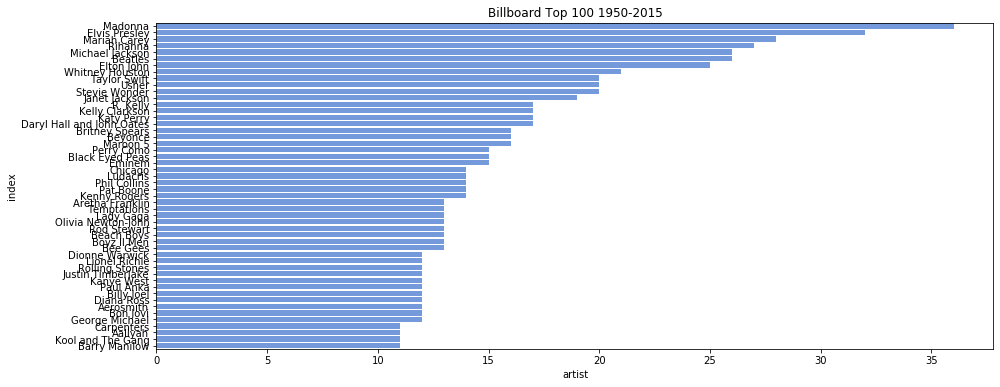

In [17]:
fig, ax = plt.subplots(figsize=(15,6))
ax.set(xlabel='Artist', ylabel='Songs in Billboard Top 100', title="Billboard Top 100 1950-2015")
sns.barplot(y='index', x='artist', data=counts, ax=ax, color='cornflowerblue')

## Q1: Are there consistently more male artists?

In [18]:
count_gender = data.groupby(['year'])['gender'].value_counts()

In [19]:
counts = pd.DataFrame(count_gender).rename_axis(['year', 'gender_cat']).reset_index()
counts.columns = ['year', 'gender', 'counts']

In [20]:
import plotly.express as px
fig = px.bar(counts, x='year', y='counts', color='gender', title='Artists by Gender in Billboard Top 100 1950-2015')
fig.update_layout(shapes=[
    dict(
      type= 'line',
      y0= 100, y1= 100,
      x0= 1950, x1= 2015
    )
])
fig.show()

## Q2: How have lyrics and audio features changed over time, and are there significant differences in the lyrics sung by female artists vs. male artists?

### Sentiment over time

In [21]:
import ast
data['sentiment'] = data['sentiment'].apply(ast.literal_eval)

In [22]:
sentiment = data['sentiment'].apply(pd.Series)
sentiment.head()
sentiment.columns = ['neg_sentiment', 'neu_sentiment', 'pos_sentiment', 'compound_sentiment']

In [23]:
data = pd.concat([data, sentiment], axis=1)
data.head()

artist        gender  num_lines  \
0         Nat King Cole          male         17   
1       Andrews Sisters  female group         31   
2            Patti Page        female         16   
3  Tennessee Ernie Ford          male         18   
4            Patti Page        female          3   

                                           sentiment  \
0  {'neg': 0.155, 'neu': 0.646, 'pos': 0.199, 'co...   
1  {'neg': 0.036000000000000004, 'neu': 0.74, 'po...   
2  {'neg': 0.053, 'neu': 0.596, 'pos': 0.35100000...   
3  {'neg': 0.167, 'neu': 0.602, 'pos': 0.231, 'co...   
4  {'neg': 0.07, 'neu': 0.85, 'pos': 0.079, 'comp...   

                       tags  f_k_grade  year  pos  num_syllables  \
0  ['jazz', 'pop', 'swing']        2.9  1950    2          189.0   
1                        []        3.3  1950   17          270.9   
2        ['country', 'pop']        2.9  1950   18          174.6   
3                        []        0.9  1950   20          135.9   
4        ['country', 'pop']        6.0  1950   21           46.8   

   difficult_words  ...  liveness valence  tempo  time_signature  \
0               13  ...       NaN     NaN    NaN             NaN   
1               40  ...       NaN     NaN    NaN             NaN   
2                5  ...       NaN     NaN    NaN             NaN   
3               10  ...       NaN     NaN    NaN             NaN   
4                9  ...       NaN     NaN    NaN             NaN   

                          category gender_cat neg_sentiment neu_sentiment  \
0    African-American_male_singers          3         0.155         0.646   
1                              NaN          1         0.036         0.740   
2  American_female_country_singers          0         0.053         0.596   
3         American_country_singers          3         0.167         0.602   
4  American_female_country_singers          0         0.070         0.850   

  pos_sentiment compound_sentiment  
0         0.199             0.8443  
1         0.224             0.9897  
2         0.351             0.9948  
3         0.231             0.8842  
4         0.079             0.0772  

[5 rows x 43 columns]

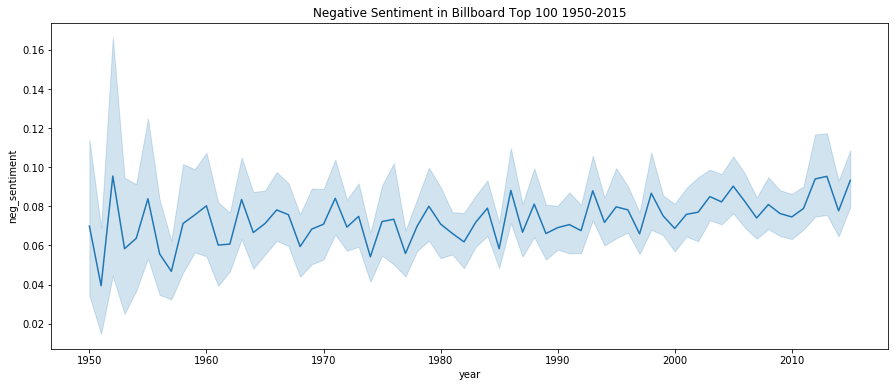

In [24]:
# avg negative sentiment
avg_neg_sentiment = data.groupby('year')['neg_sentiment'].mean().reset_index()
fig, ax = plt.subplots(figsize=(15,6))
ax.set(xlabel='Year', ylabel='Negative Sentiment', title="Negative Sentiment in Billboard Top 100 1950-2015")
sns.lineplot(x='year', y='neg_sentiment', data=data, ax=ax)

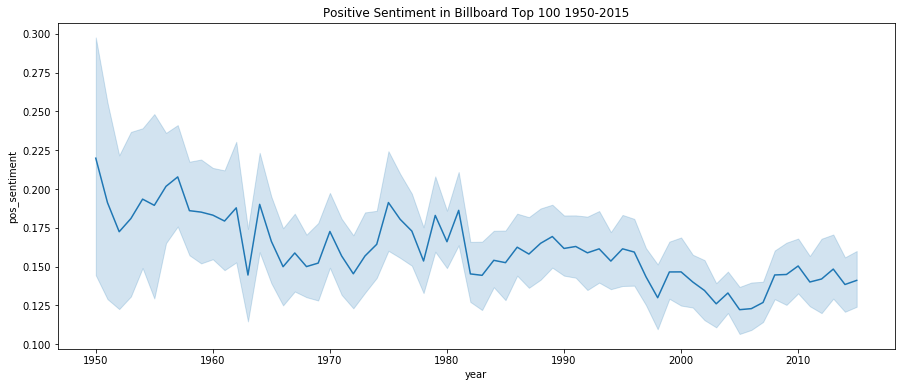

In [25]:
# avg positive sentiment
fig, ax = plt.subplots(figsize=(15,6))
ax.set(xlabel='Year', ylabel='Positive Sentiment', title="Positive Sentiment in Billboard Top 100 1950-2015")
sns.lineplot(x='year', y='pos_sentiment', data=data, ax=ax)

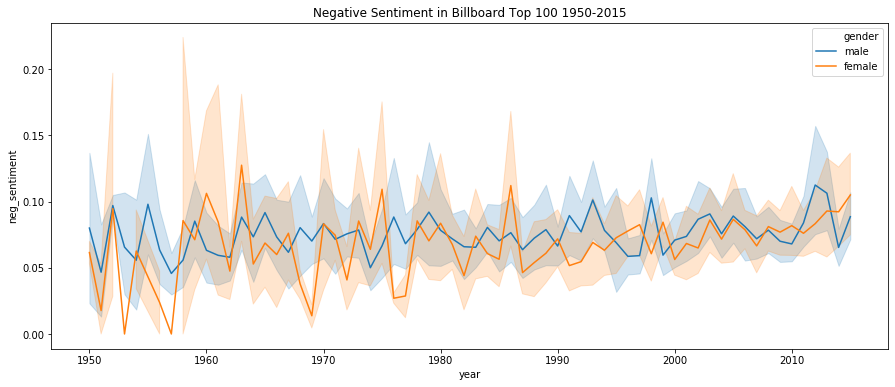

In [26]:
# negative sentiment gender 
gender_filter = data.loc[data['gender'].isin(['female', 'male'])]
fig, ax = plt.subplots(figsize=(15,6))
ax.set(xlabel='Year', ylabel='Negative Sentiment', title="Negative Sentiment in Billboard Top 100 1950-2015")
sns.lineplot(x='year', y='neg_sentiment', data=gender_filter, ax=ax, hue='gender')

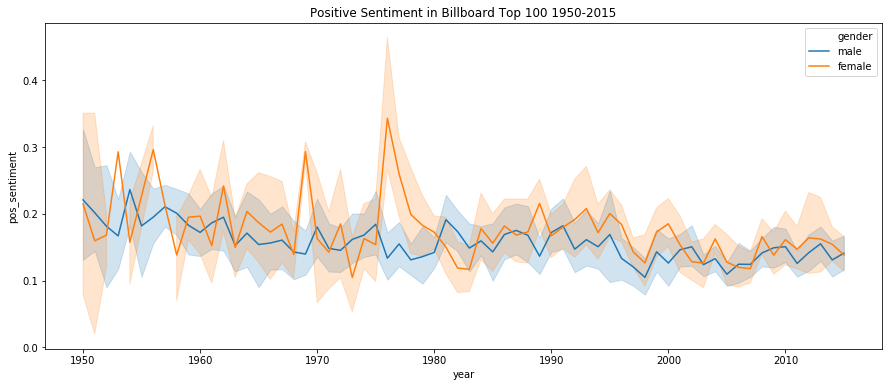

In [27]:
# positive sentiment gender 
fig, ax = plt.subplots(figsize=(15,6))
ax.set(xlabel='Year', ylabel='Positive Sentiment', title="Positive Sentiment in Billboard Top 100 1950-2015")
sns.lineplot(x='year', y='pos_sentiment', data=gender_filter, ax=ax, hue='gender')

### Top words over time

In [15]:
def clean_lyrics(lyrics):
    lyrics = lyrics.str.replace(r'\.', ' ')
    lyrics = lyrics.str.replace(r'\\s{2,}', ' ')
    lyrics = lyrics.str.replace(r'\n+', ' ')
    lyrics = lyrics.str.replace(r'[^a-zA-Z0-9 ]', '')
    lyrics = lyrics.str.lower()
    lyrics = lyrics.str.strip()
    return lyrics

In [20]:
billboard_lyrics = billboard_lyrics.assign(cleaned_lyrics = clean_lyrics(billboard_lyrics['lyrics']))
billboard_lyrics.head()

lyrics  \
0  Mona Lisa, Mona Lisa, men have named you\nYou'...   
1  I wanna be Loved\nBy Andrews Sisters\n\nOooo-o...   
2  I was dancing with my darling to the Tennessee...   
3  Each time I hold someone new\nMy arms grow col...   
4  Unfortunately, we are not licensed to display ...   

                                                tags  num_syllables  pos  \
0  [american, death by lung cancer, easy listenin...          189.0    2   
1                                  [andrews sisters]          270.9   17   
2                                     [country, pop]          174.6   18   
3                [death by liver failure, spiritual]          135.9   20   
4                                     [country, pop]           46.8   21   

   year  fog_index  flesch_index  num_words  num_lines  \
0  1950        5.2         88.74        145         17   
1  1950        4.4         82.31        189         31   
2  1950        5.2         88.74        138         16   
3  1950        4.4         99.23        117         18   
4  1950        6.0         69.79         32          3   

                                           sentiment               title  \
0  {'neg': 0.155, 'neu': 0.646, 'pos': 0.199, 'co...           Mona Lisa   
1  {'neg': 0.036000000000000004, 'neu': 0.74, 'po...    I Wanna Be Loved   
2  {'neg': 0.053, 'neu': 0.596, 'pos': 0.35100000...     Tennessee Waltz   
3  {'neg': 0.167, 'neu': 0.602, 'pos': 0.231, 'co...  I'll Never Be Free   
4  {'neg': 0.07, 'neu': 0.85, 'pos': 0.079, 'comp...         All My Love   

   f_k_grade                artist  difficult_words  num_dupes        gender  \
0        2.9         Nat King Cole               13         10          male   
1        3.3       Andrews Sisters               40         32  female group   
2        2.9            Patti Page                5         10        female   
3        0.9  Tennessee Ernie Ford               10          3          male   
4        6.0            Patti Page                9          0        female   

                                      cleaned_lyrics  
0  mona lisa mona lisa men have named you youre s...  
1  i wanna be loved by andrews sisters ooooooooh ...  
2  i was dancing with my darling to the tennessee...  
3  each time i hold someone new my arms grow cold...  
4  unfortunately we are not licensed to display t...

In [17]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Vanessa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/Vanessa/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [21]:
billboard_lyrics['cleaned_lyrics'] = billboard_lyrics['cleaned_lyrics'].str.split()
billboard_lyrics['cleaned_lyrics'] = billboard_lyrics['cleaned_lyrics'].apply(lambda l: [lemmatizer.lemmatize(w) for w in l if w not in stop_words])

In [75]:
lyrics_by_year = billboard_lyrics.groupby('year')['cleaned_lyrics'].sum().reset_index()

In [76]:
from collections import Counter
from itertools import chain

def get_word_counts(lyrics, num_most_common):
    word_counts = []
    for i in range(len(lyrics)):
        count = Counter(lyrics.iloc[i]['cleaned_lyrics']) 
        most_common = count.most_common()[0:num_most_common]
        word_counts.append(most_common)
    return word_counts

lyrics_by_year = lyrics_by_year.assign(counts = get_word_counts(lyrics_by_year, 30))
unzipped = lyrics_by_year['counts'].apply(lambda x: list(zip(*x)))
lyrics_by_year = lyrics_by_year.assign(unzipped=unzipped)

In [77]:
fig = go.Figure()
for year in lyrics_by_year['year']:
    mask = (lyrics_by_year.year.values == year)
    fig.add_trace(go.Bar(y = list(lyrics_by_year.loc[mask, 'unzipped'])[0][0], 
                         x = list(lyrics_by_year.loc[mask, 'unzipped'])[0][1],
                         orientation='h')
                 )
    
list_updatemenus = []
for n, year in enumerate(lyrics_by_year['year']):
    visible = [False] * len(lyrics_by_year['year'])
    visible[n] = True
    temp_dict = dict(label = str(year),
                 method = 'update',
                 args = [{'visible': visible},
                         {'title': 'Year %d' % year}])
    list_updatemenus.append(temp_dict)

fig.update_layout(
    width=800,
    height=500,
    autosize=False,
    margin=dict(t=0, b=0, l=0, r=0),
    template="plotly_white",
    xaxis=dict(title='Count'),
    yaxis=dict(autorange="reversed", title='Word'),
    updatemenus=list([dict(buttons=list_updatemenus,
                           pad={"r": 10, "t": 10},
                           showactive=True,
                           x=0.15,
                           xanchor="left",
                           y=1.15,
                           yanchor="top")
                     ])
)
fig.show()

In [78]:
# guys n gals
female_lyrics = billboard_lyrics.loc[billboard_lyrics['gender'].isin(['female', 'female group'])].groupby('year')['cleaned_lyrics'].sum().reset_index()
male_lyrics = billboard_lyrics.loc[billboard_lyrics['gender'].isin(['male', 'male group'])].groupby('year')['cleaned_lyrics'].sum().reset_index()

In [79]:
female_lyrics = female_lyrics.assign(counts = get_word_counts(female_lyrics, 30))
unzipped_f = female_lyrics['counts'].apply(lambda x: list(zip(*x)))
female_lyrics = female_lyrics.assign(unzipped_f=unzipped_f)

male_lyrics = male_lyrics.assign(counts = get_word_counts(male_lyrics, 30))
unzipped_m = male_lyrics['counts'].apply(lambda x: list(zip(*x)))
male_lyrics = male_lyrics.assign(unzipped_m=unzipped_m)

In [80]:
from plotly.subplots import make_subplots
    
list_updatemenus = []
for n, year in enumerate(lyrics_by_year['year']):
    visible = [False] * len(lyrics_by_year['year'])
    visible[n] = True
    temp_dict = dict(label = str(year),
                 method = 'update',
                 args = [{'visible': visible},
                         {'title': 'Top 30 Words In %d' % year}])
    list_updatemenus.append(temp_dict)

fig = make_subplots(rows=1, cols=2)

for year in lyrics_by_year['year']:
    mask = (lyrics_by_year.year.values == year)
    fig.add_trace(go.Bar(y = list(female_lyrics.loc[mask, 'unzipped_f'])[0][0], 
                         x = list(female_lyrics.loc[mask, 'unzipped_f'])[0][1],
                         orientation='h',
                         marker_color='purple',
                         name='Female'), 1, 1
                 )
    
for year in lyrics_by_year['year']:
    mask = (lyrics_by_year.year.values == year)
    fig.add_trace(go.Bar(y = list(male_lyrics.loc[mask, 'unzipped_m'])[0][0], 
                         x = list(male_lyrics.loc[mask, 'unzipped_m'])[0][1],
                         orientation='h',
                         marker_color='green',
                         name='Male'), 1, 2
                 )
    


fig.update_layout(
    width=800,
    height=500,
    autosize=False,
    margin=dict(t=0, b=0, l=0, r=0),
    template="plotly_white",
    xaxis1=dict(title='Count', range=[0, 400]),
    yaxis1=dict(autorange="reversed", title='Words (Female)'),
    xaxis2=dict(title='Count', range=[0, 400]),
    yaxis2=dict(autorange="reversed", title='Words (Male)'),
    showlegend=False,
    updatemenus=list([dict(buttons=list_updatemenus,
                           pad={"r": 10, "t": 10},
                           showactive=True,
                           x=0.25,
                           xanchor="left",
                           y=1.15,
                           yanchor="top",
                           active=0)
                     ])
)

fig.show()

In [22]:
flattened_lyrics = billboard_lyrics.apply(lambda x: pd.Series(x['cleaned_lyrics']), axis=1).stack().reset_index(level=1, drop=True)

In [23]:
flat = billboard_lyrics.iloc[list(flattened_lyrics.index)][['gender', 'year', 'artist']]
flat['lyrics'] = flattened_lyrics
                                                                       
                                                                       
                                                                       
                                                                       
                                                                       

KeyboardInterrupt: 

In [30]:
test = flat.loc[flat['year']==1950].assign(lyrics=flattened_lyrics.iloc[flat.loc[flat['year']==1950].index])

KeyboardInterrupt: 

In [ ]:
test

In [30]:
import spacy
import scattertext as st

nlp = spacy.load('en_core_web_sm')
corpus = st.CorpusFromPandas(billboard_lyrics,
                             category_col='gender',
                             text_col='cleaned_lyrics',
                             nlp=nlp).build()

In [32]:
html = st.produce_scattertext_explorer(
    corpus,
    category='female', category_name='Female', not_category_name='Male',
    minimum_term_frequency=0, pmi_threshold_coefficient=0,
    width_in_pixels=1000, metadata=corpus.get_df()['gender'],
    transform=st.Scalers.dense_rank
)

### Audio Features Over Time

In [57]:
hot_100_features_no_repeats.columns

Index(['url', 'WeekID', 'Week Position', 'Song', 'Performer', 'SongID',
       'Instance', 'Previous Week Position', 'Peak Position', 'Weeks on Chart',
       'spotify_genre', 'spotify_track_id', 'spotify_track_preview_url',
       'spotify_track_album', 'spotify_track_explicit',
       'spotify_track_duration_ms', 'spotify_track_popularity', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'month', 'day', 'year'],
      dtype='object')

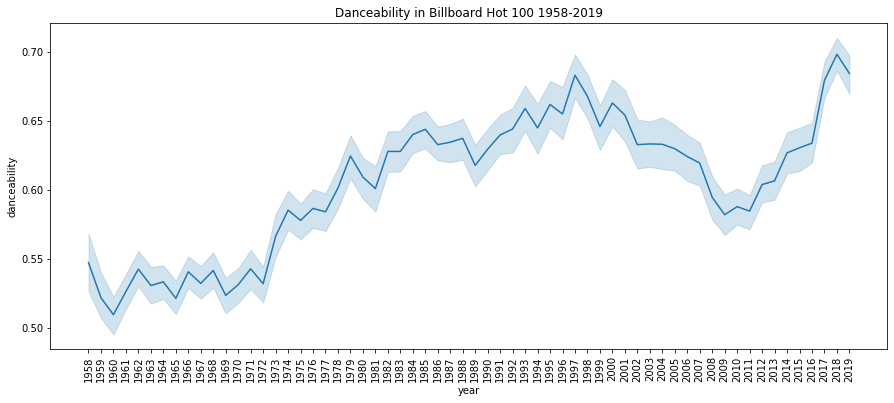

In [58]:
fig, ax = plt.subplots(figsize=(15,6))
sns.lineplot(data=hot_100_features_no_repeats, x='year', y='danceability')
plt.xticks(rotation=90);
plt.title('Danceability in Billboard Hot 100 1958-2019');

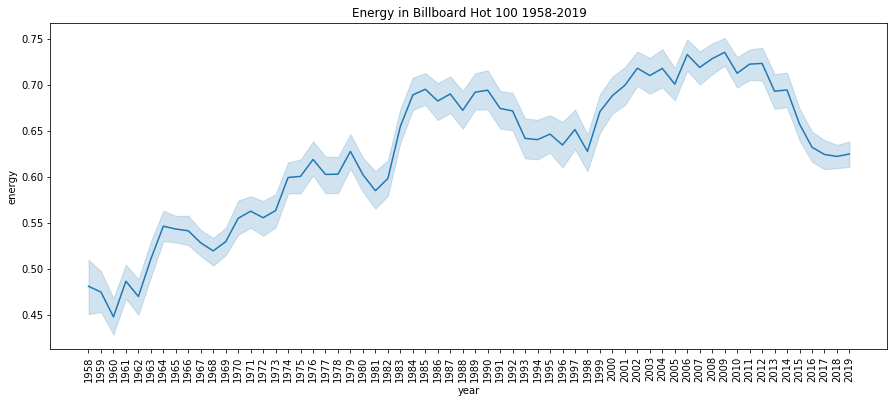

In [62]:
fig, ax = plt.subplots(figsize=(15,6))
sns.lineplot(data=hot_100_features_no_repeats, x='year', y='energy')
plt.xticks(rotation=90);
plt.title('Energy in Billboard Hot 100 1958-2019');

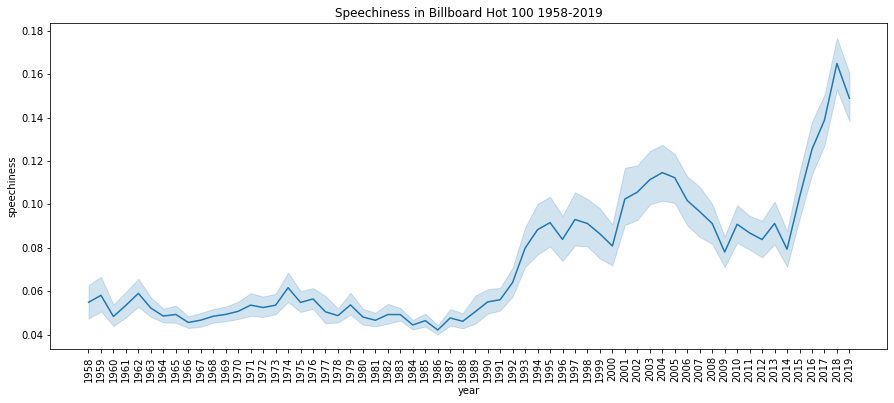

In [64]:
fig, ax = plt.subplots(figsize=(15,6))
sns.lineplot(data=hot_100_features_no_repeats, x='year', y='speechiness')
plt.xticks(rotation=90);
plt.title('Speechiness in Billboard Hot 100 1958-2019');

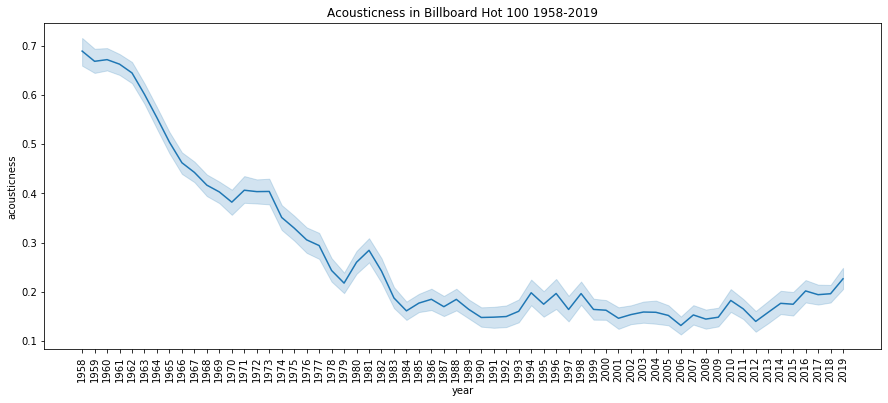

In [61]:
fig, ax = plt.subplots(figsize=(15,6))
sns.lineplot(data=hot_100_features_no_repeats, x='year', y='acousticness')
plt.xticks(rotation=90);
plt.title('Acousticness in Billboard Hot 100 1958-2019');

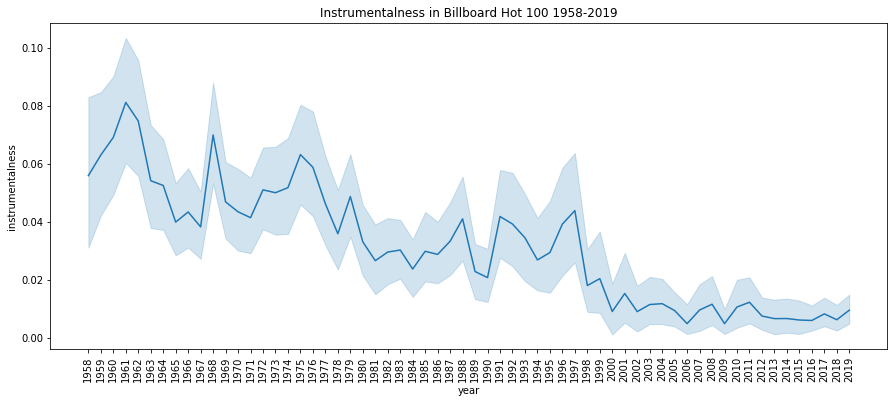

In [65]:
fig, ax = plt.subplots(figsize=(15,6))
sns.lineplot(data=hot_100_features_no_repeats, x='year', y='instrumentalness')
plt.xticks(rotation=90);
plt.title('Instrumentalness in Billboard Hot 100 1958-2019');

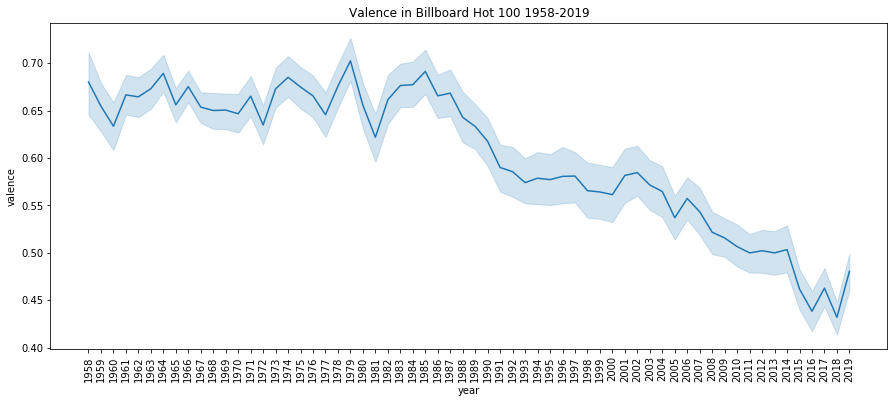

In [66]:
fig, ax = plt.subplots(figsize=(15,6))
sns.lineplot(data=hot_100_features_no_repeats, x='year', y='valence')
plt.xticks(rotation=90);
plt.title('Valence in Billboard Hot 100 1958-2019');

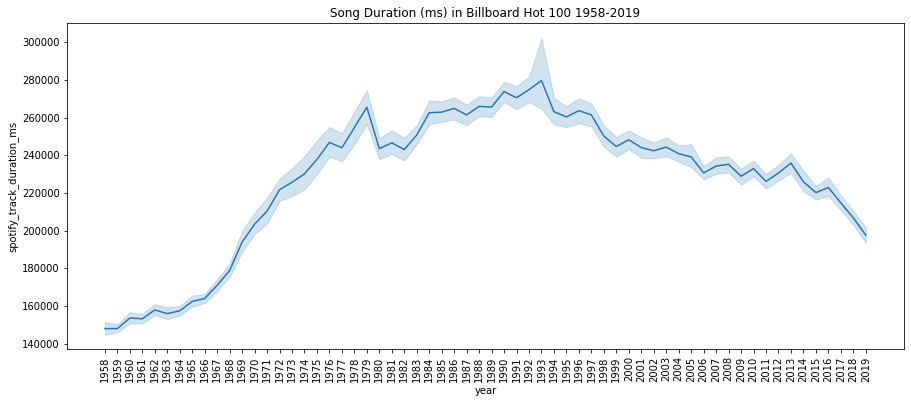

In [67]:
fig, ax = plt.subplots(figsize=(15,6))
sns.lineplot(data=hot_100_features_no_repeats, x='year', y='spotify_track_duration_ms')
plt.xticks(rotation=90);
plt.title('Song Duration (ms) in Billboard Hot 100 1958-2019');

## Q3: Do female artists who stay in the charts change their music between years more than male artists?

In [ ]:
# greater variation
# more different nouns
# variance in audio features

In [113]:
hot_100_features = pd.concat([hot_100_features, pd.DataFrame(hot_100_features['WeekID'].str.split('/').tolist(), columns = ['month','day', 'year'])], axis=1)

In [114]:
hot_100_features_no_repeats = hot_100_features.drop_duplicates(subset=['Song', 'Performer'], keep="first")

In [115]:
hot_100_features_no_repeats_counts = pd.DataFrame(hot_100_features_no_repeats.groupby(['Performer', 'year'])['Song'].count())

In [116]:
top_performers = hot_100_features_no_repeats.groupby(['Performer'])['year'].nunique().sort_values(ascending=False)

In [117]:
top_performers = pd.DataFrame(top_performers).reset_index()

In [118]:
top_performers = top_performers.loc[top_performers['year'] >= 10]

In [119]:
hot_100_features_top_performers = hot_100_features_no_repeats.loc[hot_100_features_no_repeats['Performer'].isin(top_performers['Performer'])]

In [120]:
hot_100_features_top_performers

url      WeekID  \
2       http://www.billboard.com/charts/hot-100/1997-1...  10/11/1997   
4       http://www.billboard.com/charts/hot-100/2009-1...  10/24/2009   
6       http://www.billboard.com/charts/hot-100/2012-0...    3/3/2012   
7       http://www.billboard.com/charts/hot-100/2014-0...    9/6/2014   
15      http://www.billboard.com/charts/hot-100/1996-0...    4/6/1996   
...                                                   ...         ...   
303764  http://www.billboard.com/charts/hot-100/1963-0...   1/26/1963   
303971  http://www.billboard.com/charts/hot-100/1986-0...   1/18/1986   
304106  http://www.billboard.com/charts/hot-100/1983-0...   1/29/1983   
304131  http://www.billboard.com/charts/hot-100/1962-0...   3/31/1962   
304185  http://www.billboard.com/charts/hot-100/2005-0...   2/26/2005   

        Week Position                                               Song  \
2                   1  Candle In The Wind 1997/Something About The Wa...   
4                   1                                                  3   
6                   1                                         Part Of Me   
7                   1                                       Shake It Off   
15                  2                                  Always Be My Baby   
...               ...                                                ...   
303764             81                              What Will My Mary Say   
303971             96                                      What You Need   
304106             81                                What You're Missing   
304131             70                              What'd I Say (Part 1)   
304185            100                              What's A Guy Gotta Do   

             Performer                                             SongID  \
2           Elton John  Candle In The Wind 1997/Something About The Wa...   
4       Britney Spears                                    3Britney Spears   
6           Katy Perry                               Part Of MeKaty Perry   
7         Taylor Swift                           Shake It OffTaylor Swift   
15        Mariah Carey                      Always Be My BabyMariah Carey   
...                ...                                                ...   
303764   Johnny Mathis                 What Will My Mary SayJohnny Mathis   
303971            INXS                                  What You NeedINXS   
304106         Chicago                         What You're MissingChicago   
304131     Bobby Darin                   What'd I Say (Part 1)Bobby Darin   
304185     Joe Nichols                   What's A Guy Gotta DoJoe Nichols   

        Instance  Previous Week Position  Peak Position  Weeks on Chart  ...  \
2              1                     NaN              1               1  ...   
4              1                     NaN              1               1  ...   
6              1                     NaN              1               1  ...   
7              1                     NaN              1               1  ...   
15             1                     NaN              2               1  ...   
...          ...                     ...            ...             ...  ...   
303764         1                     NaN             81               1  ...   
303971         1                     NaN             96               1  ...   
304106         1                     NaN             81               1  ...   
304131         1                     NaN             70               1  ...   
304185         1                     NaN            100               1  ...   

       speechiness acousticness instrumentalness liveness  valence    tempo  \
2              NaN          NaN              NaN      NaN      NaN      NaN   
4              NaN          NaN              NaN      NaN      NaN      NaN   
6              NaN          NaN              NaN      NaN      NaN      NaN   
7              NaN          NaN              NaN      NaN     

In [105]:
hot_100_features_top_performers = hot_100_features_top_performers.merge(data, how='left', left_on='Performer', right_on='artist')

In [106]:
hot_100_features_top_performers

url      WeekID  \
0      http://www.billboard.com/charts/hot-100/1997-1...  10/11/1997   
1      http://www.billboard.com/charts/hot-100/1997-1...  10/11/1997   
2      http://www.billboard.com/charts/hot-100/1997-1...  10/11/1997   
3      http://www.billboard.com/charts/hot-100/1997-1...  10/11/1997   
4      http://www.billboard.com/charts/hot-100/1997-1...  10/11/1997   
...                                                  ...         ...   
41078  http://www.billboard.com/charts/hot-100/1962-0...   3/31/1962   
41079  http://www.billboard.com/charts/hot-100/1962-0...   3/31/1962   
41080  http://www.billboard.com/charts/hot-100/1962-0...   3/31/1962   
41081  http://www.billboard.com/charts/hot-100/1962-0...   3/31/1962   
41082  http://www.billboard.com/charts/hot-100/2005-0...   2/26/2005   

       Week Position                                             Song_x  \
0                  1  Candle In The Wind 1997/Something About The Wa...   
1                  1  Candle In The Wind 1997/Something About The Wa...   
2                  1  Candle In The Wind 1997/Something About The Wa...   
3                  1  Candle In The Wind 1997/Something About The Wa...   
4                  1  Candle In The Wind 1997/Something About The Wa...   
...              ...                                                ...   
41078             70                              What'd I Say (Part 1)   
41079             70                              What'd I Say (Part 1)   
41080             70                              What'd I Say (Part 1)   
41081             70                              What'd I Say (Part 1)   
41082            100                              What's A Guy Gotta Do   

       Performer_x                                           SongID_x  \
0       Elton John  Candle In The Wind 1997/Something About The Wa...   
1       Elton John  Candle In The Wind 1997/Something About The Wa...   
2       Elton John  Candle In The Wind 1997/Something About The Wa...   
3       Elton John  Candle In The Wind 1997/Something About The Wa...   
4       Elton John  Candle In The Wind 1997/Something About The Wa...   
...            ...                                                ...   
41078  Bobby Darin                   What'd I Say (Part 1)Bobby Darin   
41079  Bobby Darin                   What'd I Say (Part 1)Bobby Darin   
41080  Bobby Darin                   What'd I Say (Part 1)Bobby Darin   
41081  Bobby Darin                   What'd I Say (Part 1)Bobby Darin   
41082  Joe Nichols                   What's A Guy Gotta DoJoe Nichols   

       Instance  Previous Week Position  Peak Position  Weeks on Chart  ...  \
0             1                     NaN              1               1  ...   
1             1                     NaN              1               1  ...   
2             1                     NaN              1               1  ...   
3             1                     NaN              1               1  ...   
4             1                     NaN              1               1  ...   
...         ...                     ...            ...             ...  ...   
41078         1                     NaN             70               1  ...   
41079         1                     NaN             70               1  ...   
41080         1                     NaN             70               1  ...   
41081         1                     NaN             70               1  ...   
41082         1                     NaN            100               1  ...   

      mode_y speechiness_y acousticness_y instrumentalness_y  liveness_y  \
0        1.0        0.0285         0.3860           0.000014      0.0941   
1        0.0        0.0358         0.0326           0.000014      0.0596   
2        1.0        0.0293         0.4140           0.000041      0.0882   
3        1.0        0.0493         0.2590           0.000008      0.4970   
4        1.0        0.0279         0.4460           0.001410      0.1540   
...  

In [104]:
hot_100_features_top_performers.to_csv('./output/hot_100_top_performers.csv')

## Q4: When female artists make it into the Top 100, are they more likely to claim higher positions on the chart?

In [ ]:
# some sort of regression